# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

Dataset yang digunakan dalam analisis ini adalah Diamond Prices =  https://www.kaggle.com/datasets/vittoriogiatti/diamondprices/data

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [48]:
# Memuat dataset dari file CSV
data = pd.read_csv('DiamondsPrices.csv')

# Menampilkan 5 baris pertama dari dataset untuk memeriksa strukturnya
data.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    3

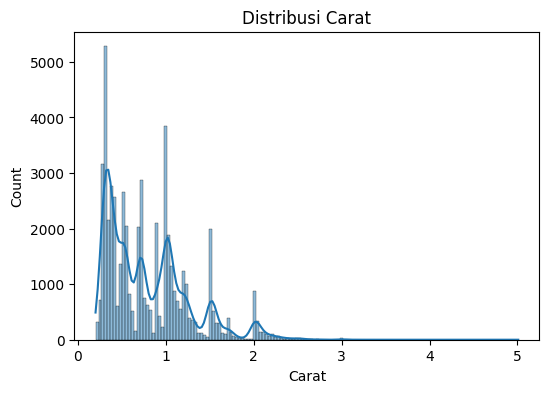

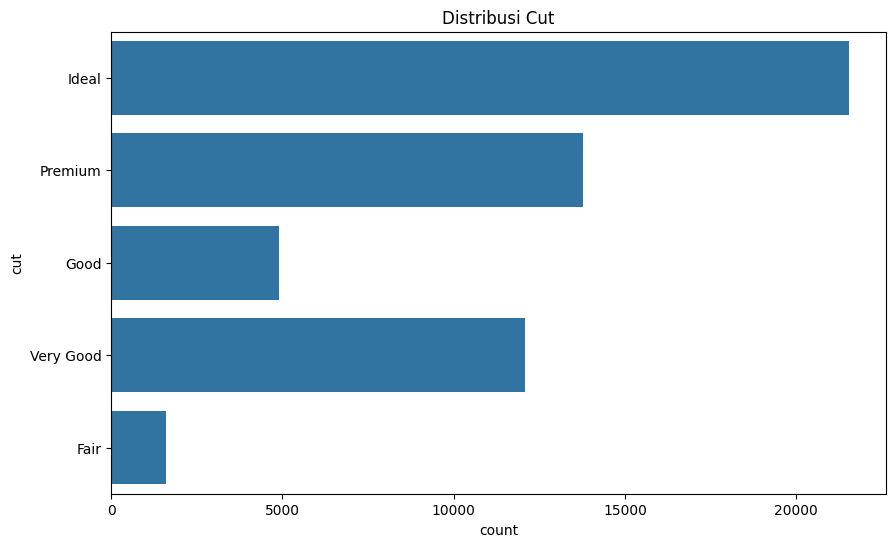

Missing values per column:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [49]:
# 1. Memahami struktur data
print(data.info())
print(data.describe())

# 2. Visualisasi distribusi data numerikal
plt.figure(figsize=(6, 4))
sns.histplot(data['carat'], kde=True)
plt.title('Distribusi Carat')
plt.xlabel('Carat')
plt.show()

# 3. Visualisasi data kategorikal (Provinsi)
plt.figure(figsize=(10, 6))
sns.countplot(y=data['cut'])
plt.title('Distribusi Cut')
plt.show()

# 4. Cek missing values
print("Missing values per column:")
print(data.isnull().sum())

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [50]:
# Mengubah kolom numerikal menjadi angka dan menangani error
data['carat'] = pd.to_numeric(data['carat'], errors='coerce')

# Menghapus baris dengan nilai kosong
data = data.dropna()

# Pastikan semua nilai kosong telah dihapus
print("Jumlah nilai kosong per kolom setelah dropna:")
print(data.isnull().sum())

Jumlah nilai kosong per kolom setelah dropna:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [51]:
# Menghapus duplikasi
data = data.drop_duplicates()
print("Jumlah data setelah menghapus duplikasi:", data.shape[0])

Jumlah data setelah menghapus duplikasi: 53794


In [52]:
from sklearn.preprocessing import StandardScaler

# Standarisasi kolom numerikal
scaler = StandardScaler()
data['data_content_scaled'] = scaler.fit_transform(data[['carat']])

In [53]:
# Saya menggunakan algoritma IQR untuk mendeteksi outlier pada kolom numerikal
Q1 = data['carat'].quantile(0.25)
Q3 = data['carat'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus outlier
data = data[(data['carat'] >= lower_bound) & (data['carat'] <= upper_bound)]
print("Jumlah data setelah menghapus outlier:", data.shape[0])

Jumlah data setelah menghapus outlier: 51921


In [54]:
# One-hot encoding untuk kolom kategorikal
data_encoded = pd.get_dummies(data, columns=['cut', 'color', 'clarity'])

# Tampilkan hasil encoding
print("Kolom setelah encoding:", data_encoded.columns)

Kolom setelah encoding: Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z',
       'data_content_scaled', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')


In [55]:
# Membuat binning pada 'data_content_scaled' menjadi 3 kategori
data.loc[:, 'content_category'] = pd.cut(data['data_content_scaled'], bins=3, labels=['Low', 'Medium', 'High'])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [56]:
from sklearn.cluster import KMeans

# Definisikan kolom numerikal dan kategorikal
numerical_columns = ['carat']  # Kolom numerikal yang digunakan
categorical_columns = ['cut']  # Kolom kategorikal yang digunakan

# One-hot encoding untuk kolom kategorikal
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Gabungkan data numerikal dan hasil encoding
data_clustering = pd.concat([data_encoded[numerical_columns],
                            data_encoded[['cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good']]],
                           axis=1)

# Periksa apakah ada nilai NaN di data clustering
print("Jumlah nilai NaN di dalam data clustering:", data_clustering.isnull().sum().sum())

# Jalankan model K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data.loc[:, 'Cluster'] = kmeans.fit_predict(data_clustering)

# Tampilkan hasil cluster
print("Cluster labels telah ditambahkan ke dataset")
data.head()

Jumlah nilai NaN di dalam data clustering: 0
Cluster labels telah ditambahkan ke dataset


carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

   data_content_scaled content_category  Cluster  
0            -1.199402              Low        1  
1            -1.241651              Low        2  
2            -1.199402              Low        0  
3            -1.072656              Low        2  
4            -1.030407              Low        0

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [57]:
from sklearn.metrics import silhouette_score

# Evaluasi Silhouette Score
silhouette_avg = silhouette_score(data_clustering, data['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.59


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [58]:
from sklearn.feature_selection import mutual_info_classif

# Mengidentifikasi fitur penting
features = data_clustering.columns  # Gunakan semua kolom di data_clustering
mutual_info = mutual_info_classif(data_clustering, data['Cluster'])
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': mutual_info
}).sort_values(by='Importance', ascending=False)

# Tampilkan fitur penting
print("Fitur yang paling berpengaruh terhadap clustering:")
print(feature_importance)

Fitur yang paling berpengaruh terhadap clustering:
         Feature  Importance
3      cut_Ideal    0.679445
4    cut_Premium    0.564671
5  cut_Very Good    0.310130
2       cut_Good    0.107064
0          carat    0.059891
1       cut_Fair    0.032078


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

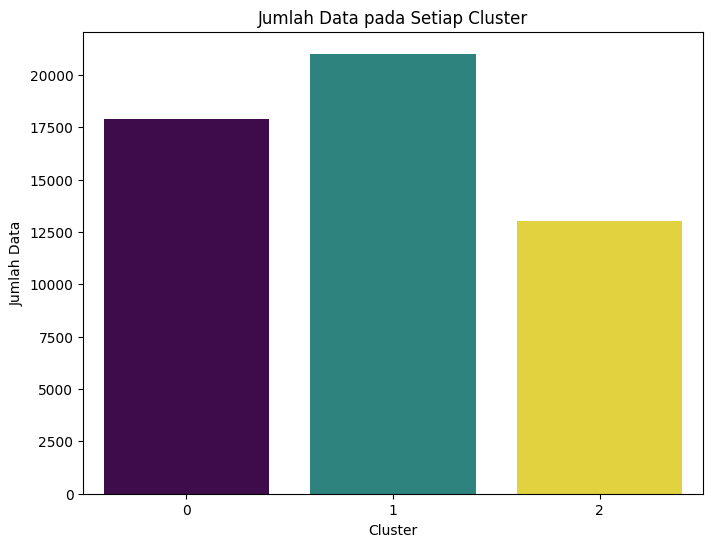

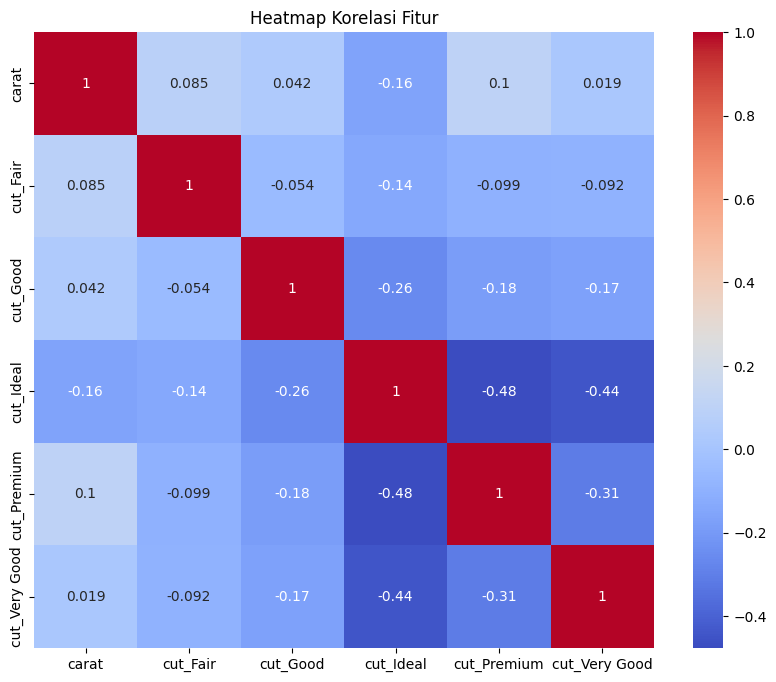

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi jumlah data per cluster
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', hue='Cluster', data=data, palette='viridis', legend=False)
plt.title('Jumlah Data pada Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.show()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_clustering.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur')
plt.show()

# Boxplot
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=column, data=data)
    plt.title(f'Boxplot {column} per Cluster')
    plt.show()

# Gabungkan kolom 'Cluster' ke data_clustering
data_clustering['Cluster'] = data['Cluster']

# Histogram untuk kolom numerikal 'carat'
plt.figure(figsize=(8, 6))
sns.histplot(x=numerical_columns[0], hue='Cluster', data=data_clustering, palette='viridis')  # Perubahan di sini
plt.title('Distribusi Carat per Cluster')
plt.xlabel(numerical_columns[0])
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [62]:
# Hitung rata-rata untuk tiap cluster
for cluster in sorted(data['Cluster'].unique()):
    cluster_data = data[data['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"Rata-rata 'carat': {cluster_data['carat'].mean():.2f}")
    print(f"Nilai Dominan: {cluster_data['cut'].mode()[0]}")


Cluster 0:
Rata-rata 'carat': 0.79
Nilai Dominan: Very Good

Cluster 1:
Rata-rata 'carat': 0.67
Nilai Dominan: Ideal

Cluster 2:
Rata-rata 'carat': 0.82
Nilai Dominan: Premium


Tulis hasil interpretasinya di sini.

**1. Cluster 0:**
- Rata-rata carat: 0.79
- Nilai Dominan: Very Good
- Cluster ini kemungkinan besar merepresentasikan berlian dengan ukuran sedang dan kualitas yang baik. Rata-rata berat carat (0.79) menunjukkan berlian-berlian dalam cluster ini berukuran relatif sedang. Potongan 'Very Good' menunjukkan kualitas potongan yang baik, meskipun tidak seoptimal potongan 'Ideal'. Berlian dalam cluster ini mungkin menawarkan keseimbangan antara ukuran, kualitas, dan harga.

**2. Cluster 1:**
- Rata-rata carat: 0.67
- Nilai Dominan: Ideal
- Cluster ini kemungkinan besar merepresentasikan berlian dengan ukuran relatif kecil dan kualitas potongan yang optimal. Rata-rata berat carat yang rendah (0.67) menunjukkan berlian-berlian dalam cluster ini berukuran relatif kecil. Potongan 'Ideal' menunjukkan kualitas potongan yang optimal, yang biasanya menghasilkan berlian yang lebih cemerlang. Berlian dalam cluster ini mungkin menjadi pilihan yang populer untuk perhiasan dengan harga yang lebih terjangkau, tetapi tetap memiliki kualitas potongan yang baik.

**3. Cluster 2:**
- Rata-rata carat: 0.82
- Nilai Dominan: Premium
- Cluster ini kemungkinan besar merepresentasikan berlian dengan ukuran sedang dan kualitas potongan premium. Rata-rata berat carat (0.82) menunjukkan berlian-berlian dalam cluster ini berukuran relatif sedang. Potongan 'Premium' menunjukkan kualitas potongan yang baik, meskipun tidak seoptimal potongan 'Ideal'. Berlian dalam cluster ini mungkin menawarkan keseimbangan antara ukuran dan harga, dengan kualitas potongan yang sedikit lebih tinggi dibandingkan cluster 0.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [63]:
# Menyimpan dataset dengan hasil clustering ke file csv
from google.colab import files
data.to_csv('hasil_clustering_DiamondsPrices.csv', index=False)
print("Hasil clustering telah disimpan ke 'hasil_clustering_DiamondsPrices.csv'")

files.download('hasil_clustering_DiamondsPrices.csv')

Hasil clustering telah disimpan ke 'hasil_clustering_DiamondsPrices.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>